In [3]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
tsla_soup = BeautifulSoup(open(r"C:\Users\User\Desktop\thesis_17_3_2022\stock_price_and_news\stock_news\dataset\tsla_final\tsla_2017_jan.html", encoding="utf8"))


In [5]:
tsla_timestamp = []
for e in tsla_soup.find_all("span", {"class": "article__timestamp"}):
    tsla_timestamp.append(e.get_text())

In [6]:
tsla_file = []
for tsla_text in tsla_soup.find_all("h3"):
    tsla_file.append(tsla_text.get_text())

In [7]:
tsla_file[-10:]

['\n\n                            \n                            Coatue Management Llc Buys Rivian Automotive Inc, Pfizer Inc, Visa Inc, Sells DoorDash Inc, ...\n                        \n',
 '\n\n                            \n                            Myriad Asset Management Ltd. Buys Tesla Inc, Mirion Technologies Inc, Enphase Energy Inc, Sells ...\n                        \n',
 '\n\n                            \n                            7 Top Stocks for February Ready for V-Shaped Bounce\n                        \n',
 '\n\n                            \n                            Why Tesla Stock Raced Ahead on Monday\n                        \n',
 '\n\n                            \n                            Twilio Stock Has Disaster Stats, But It Also Has Great Potential\n                        \n',
 '\n\n                            \n                            Nio’s Results Should Show the Tesla Competitor is Real Competition\n                        \n',
 '\n\n            

In [8]:
tsla_clean1 = []
for tsla_text1 in tsla_file:
    tsla_clean1.append(tsla_text1.replace("\n", ""))

In [9]:
tsla_remove = []
for e in tsla_clean1:
    if e not in ('Virgin Galactic stock jumps 30% as space-tourism tickets to open soon',
 "Barron'sGap Stock Gets a Downgrade. 2 Big Issues Worry the Analyst.",
 "Meta changes News Feed to 'Feed'",
 'Avis stock sinks as bears focus on revenue per day disappointment over earnings beat',
 "BreakingBiden to give 'update' on Russia and Ukraine, White House says",
 'OpinionDon’t be fearful: Stock market investors could ultimately benefit from an economic recession',
 'This Wall Street pro foresaw high inflation. Here’s what he thinks the Fed has to do',
 'Senate Republicans plan to boycott committee vote on Powell and four other Biden Fed picks',
 "Biden to say U.S. 'remains open to high-level diplomacy' with Russia ",
 "Barron'sSenate Republicans to Delay Panel Vote on Raskin Fed Nomination",
 'Biden to speak on Russia and Ukraine situation at 3:30 p.m. Eastern, White House says',
 "Barron'sSenate Republicans to Delay Panel Vote on Raskin Fed Nomination",
 'Why the Russia-Ukraine crisis may make food-price inflation even worse',
 'PSEG boosts dividends, as implied yield remains well more than double that of the S&P 500',
 "Barron'sVirgin Galactic Opens Reservations for Space. How to Book a Flight.",
 'PSEG raises quarterly dividend by nearly 6% to 54 cents a share',
 'Lower house of parliament calls on Putin to recognize pro-Russia eastern regions of Ukraine as legitimate republics',
 "Barron'sGE Stock Is Soaring. The Annual Report Has Provided a Boost.",
 'Cannabis banking firm Safe Harbor going public via SPAC deal',
 'Over 112 million people watched the Super Bowl — up 14% from last year',
 "Barron'sStanley Druckenmiller Got Bullish on Chevron. Should You Be?",
 "Barron'sFisker Is Taking Orders for Its New EV. Starting Price Is Below $30,000. ",
 'More states are preventing local governments from requiring paid sick leave —  but low-wage workers end up paying the price',
 '‘It’s really hard for locals to compete’: Out-of-towners have one major advantage over locals in America’s hottest housing markets',
 'Cannabis beverage company Cann gets backing from Green Thumb Industries and celebrity investors',
 'Over 112 million people watched the Super Bowl — up 14% from last year',
 'Prince Andrew reaches settlement with Virginia Giuffre in sexual abuse lawsuit',
 'Over 112 million people watched the Super Bowl — up 14% from last year',
 'CorrectionCanada announces sweeping measures to end trucker protests against virus restrictions, as U.S. COVID death toll tops 922,000',
 "Barron'sWhy Now Is the Time to Dive Into Tech Stocks",
 "Barron'sAir-Taxi Stock Joby Is Soaring. An Airline Deal Shows the Sector's Potential.",
 "Barron'sStocks Jump After Russia Says Troops Are Pulling Back From Ukraine ",
 "Amazon's Just Walk Out technology lands at NYC's LaGuardia Airport",
 "Barron'sWhy Apple Is Outpacing Netflix, Microsoft, and the Rest of Big Tech",
 'Sandy Hook families settle with gun maker Remington for $73 million',
 "BreakingBoeing, Nike share gains lead Dow's 382-point rally",
 "Barron'sTesla Stock Needs to Break Free From Putin and Powell",
 'Fisker to start reservations for second EV, with production slated for November',
 "Barron'sMastercard Is Hiring to Expand Crypto and ESG Consulting.",
 'Dow jumps over 400 points as Russia-Ukraine tensions ease',
 "Barron'sTesla Stock Has Catalysts. It Needs to Break Free From Putin and Powell.",
 'OpinionThis fail-safe protection against inflation is back',
 "Barron'sNvidia's Earnings Could Be a Big Win. What to Expect.",
 "Barron'sCoinbase Plans to Hire 2,000 Employees Because of  'Enormous' Web3 Opportunities",
 'Amazon lifts mask requirement for fully vaccinated workers',
 "Barron'sWhat a Monster, Constellation Merger Might Mean and Why Coca-Cola Could Be Key",
 "Barron'sBitcoin Is Bouncing. Russia Is Helping. ",
 'Pentagon report shows contractor mergers hurt U.S. economy and national security',
 'I have $1 million and a $100,000-a-year pension. My girlfriend and I are getting married, but she’s against a prenup. What should I do?',
 'Iamgold upgraded to outperform from market perform at BMO Capital',
 'Petroshale started at outperform at BMO Capital',
 'This is what you’re getting wrong about ESG ratings',
 'Gap stock price target cut to $14 from $26 at BofA Securities',
 'Gap downgraded to underperform from neutral at BofA Securities',
 'Oil drops more than 4% from a 7-year high as Russia says some troops returning to base',
 'DTE Energy double upgraded to buy from underperform at BofA Securities',
 'Canada announces sweeping measures to end trucker protests against virus restrictions, as U.S. COVID death toll tops 922,000',
 "Barron'sFamed Spelling Manor in Los Angeles Lists for $165 Million",
 '‘I offered a $10,000 reward for the person who introduces me to my future partner’: I’m 34, single and disabled. How do I meet the woman of my dreams?',
 'OpinionInflation is making some seniors choose between food and medications — what you can do',
 'No Recent Tickers',
 'Overview'):
        tsla_remove.append(e)

In [10]:
tsla_space = []
for e in tsla_remove:
    tsla_space.append(e.strip())

In [11]:
tsla_fullstop = []
for e in tsla_space:
    tsla_fullstop.append(e.replace(".",""))

In [12]:
tsla_q = []
for e in tsla_fullstop:
    tsla_q.append(e.replace("?",""))

In [13]:
tsla_colon = []
for e in tsla_q:
    tsla_colon.append(e.replace(":",""))

In [14]:
tsla_comma = []
for e in tsla_colon:
    tsla_comma.append(e.replace(",",""))

In [15]:
tsla_percent = []
for e in tsla_comma:
    tsla_percent.append(e.replace("%","percent"))

In [16]:
tsla_lower = []
for i in range(len(tsla_percent)):
    tsla_lower.append(tsla_percent[i].lower())

In [17]:
tsla_pain = []
for e in tsla_lower:
    if e not in ( 'marketwatch',
 'company',
 'dow jones network'):
        tsla_pain.append(e)


In [18]:
tsla_pain[-10:]

['eulav asset management buys uber technologies inc tesla inc roku inc sells ball corp ',
 "big tech's big returns and sports business in the spotlight",
 '7 stocks to love for a long long time',
 'coatue management llc buys rivian automotive inc pfizer inc visa inc sells doordash inc ',
 'myriad asset management ltd buys tesla inc mirion technologies inc enphase energy inc sells ',
 '7 top stocks for february ready for v-shaped bounce',
 'why tesla stock raced ahead on monday',
 'twilio stock has disaster stats but it also has great potential',
 'nio’s results should show the tesla competitor is real competition',
 '3 top ev stocks to buy during the market correction']

In [19]:
tsla_timestamp = []
for e in tsla_soup.find_all("span", {"class": "article__timestamp"}):
    tsla_timestamp.append(e.get_text())

In [20]:
tsla_et = []
for e in tsla_timestamp:
    tsla_et.append(e.replace("ET",""))

In [21]:
tsla_at1 = []
for e in tsla_et:
    tsla_at1.append(e.replace("at",""))

In [22]:
tsla_pm1 = []
for e in tsla_at1:
    tsla_pm1.append(e.replace("p.m.",""))

In [23]:
tsla_am1 = []
for e in tsla_pm1:
    tsla_am1.append(e.replace("a.m.",""))

In [24]:
tsla_commas = []
for e in tsla_am1:
    tsla_commas.append(e.replace(",",""))

In [25]:
tsla_fullstops = []
for e in tsla_commas:
    tsla_fullstops.append(e.replace(".",""))

In [26]:
tsla_timestamp_final = tsla_fullstops

In [27]:
tsla_timestamp_final[-5:]

['Feb 14 2022  2:21  ',
 'Feb 14 2022  11:28  ',
 'Feb 14 2022  10:50  ',
 'Feb 14 2022  10:31  ',
 'Feb 14 2022  10:15  ']

In [28]:
tsla_date = [datetime.strptime(x,'%b %d %Y  %I:%M ') for x in tsla_timestamp_final]


In [29]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500000000)

In [30]:

tsla_data = pd.DataFrame(
    {'Date': tsla_date,
     'text_headlines': tsla_pain
     
    })

In [31]:
#tsla_data.to_csv('tsla_topic_selection.csv', index = True)


In [32]:
tsla_news_matrix = tf_vectorizer.fit_transform(tsla_data['text_headlines'])


In [37]:
lda = LatentDirichletAllocation(n_components=4,doc_topic_prior = 0.91,topic_word_prior= 0.31 , learning_method='online', random_state=0, verbose=0, n_jobs = -1)


In [38]:
lda_model = lda.fit(tsla_news_matrix)
lda_matrix = lda_model.transform(tsla_news_matrix)
lda_matrix

array([[0.14593502, 0.56163241, 0.14616047, 0.14627211],
       [0.27922142, 0.15336409, 0.41541349, 0.15200099],
       [0.20757263, 0.14178193, 0.51125466, 0.13939078],
       ...,
       [0.15435048, 0.40674888, 0.22326328, 0.21563736],
       [0.27703286, 0.25185897, 0.15458899, 0.31651918],
       [0.20838888, 0.17233186, 0.38986139, 0.22941786]])

In [39]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Print the topics found by the LDA model
#print("Topics found via LDA:")
#print_topics(lda_model, tsla_news_matrix, 15)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7600 samples in 0.008s...
[t-SNE] Computed neighbors for 7600 samples in 0.330s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7600
[t-SNE] Computed conditional probabilities for sample 2000 / 7600
[t-SNE] Computed conditional probabilities for sample 3000 / 7600
[t-SNE] Computed conditional probabilities for sample 4000 / 7600
[t-SNE] Computed conditional probabilities for sample 5000 / 7600
[t-SNE] Computed conditional probabilities for sample 6000 / 7600
[t-SNE] Computed conditional probabilities for sample 7000 / 7600
[t-SNE] Computed conditional probabilities for sample 7600 / 7600
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.121277
[t-SNE] KL divergence after 1000 iterations: 0.850492


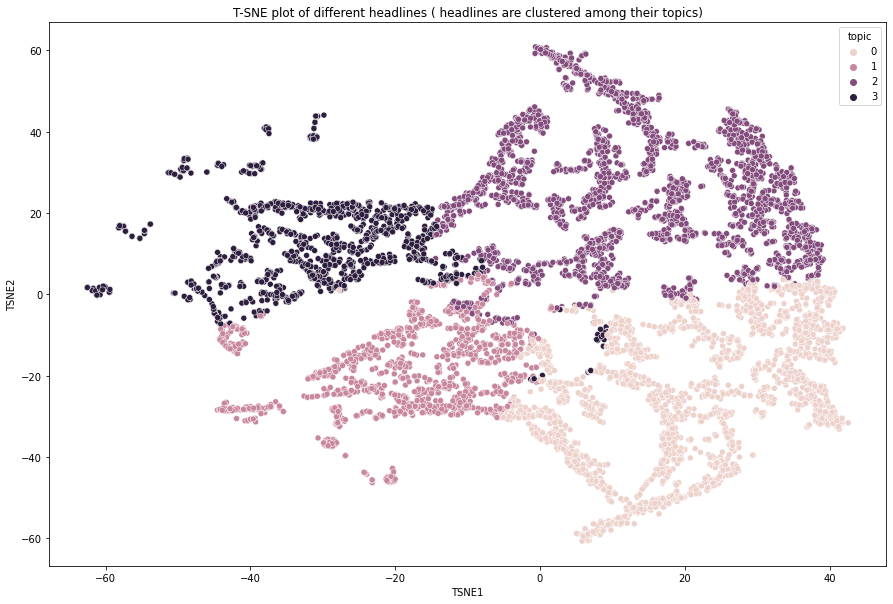

In [40]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()